In [26]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install pandas numpy statsmodels matplotlib


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 4.9 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.8 MB 5.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.8 MB 4.5 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.8 MB 4.5 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.8 MB 3.1 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.8 MB 2.5 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/9.8 MB 2.3 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/9.8 MB 2.3 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/9.8 MB 2.0 MB/s eta 0:00:04
   ---------------- ----------------------- 3.9/9.8 MB 1.9 MB/s eta 0:00:04
   ----------------- ---------------------- 4.2/9.8 MB 1.8 MB/s eta 0:00:04
   ------------------ --------------------- 4.5/9.8 MB 1.7 MB/s eta 0:00:04
   ---------------

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [36]:
#Load the ELB-Sales_data_set

df = pd.read_excel(r'C:\Users\vimal\OneDrive\Desktop\Python\Forcasting_October_Sales\ELB-Sales-Data.xlsx', parse_dates=['Date'])
df.head()

,Sr,ID,Customer,Primary Sales,Cancelled,Is added to primary log,Against Expiry,Breakage,Claim Offer,Quantity,...,Free Item,HQ,Sales Team,Return for Reason,Sales Return,Sales Invoice Name,Rate Difference,Item Name,Free Item Value,Date
0,9354,SL-10-24-268441,SESHABALAJEE MEDISOLUTIONS PVT LTD,135.08,1,1,135.08,0.0,0.0,-4,...,0,HQ-Vizag,Elbrit AP,Expired,0.0,SINV-24-01509,0.0,TELBRIT 20,0.0,2024-09-23
1,9355,SL-10-24-268440,SESHABALAJEE MEDISOLUTIONS PVT LTD,413.80,1,1,413.80,0.0,0.0,-4,...,0,HQ-Vizag,Elbrit AP,Expired,0.0,SINV-24-01509,0.0,DAFAX M 5,0.0,2024-09-23
2,9356,SL-10-24-268439,SESHABALAJEE MEDISOLUTIONS PVT LTD,210.38,1,1,210.38,0.0,0.0,-2,...,0,HQ-Vizag,Elbrit AP,Expired,0.0,SINV-24-01509,0.0,TELBRIT AM,0.0,2024-09-23
3,9357,SL-10-24-268438,SESHABALAJEE MEDISOLUTIONS PVT LTD,105.19,1,1,105.19,0.0,0.0,-1,...,0,HQ-Vizag,Elbrit AP,Expired,0.0,SINV-24-01509,0.0,TELBRIT H,0.0,2024-09-23
4,9358,SL-10-24-268437,SESHABALAJEE MEDISOLUTIONS PVT LTD,978.30,1,1,978.30,0.0,0.0,-9,...,0,HQ-Vizag,Elbrit AP,Expired,0.0,SINV-24-01509,0.0,TRIGLIMIBRIT 1.3,0.0,2024-09-23


In [37]:
df['Date'] = pd.to_datetime(df['Date'])

In [38]:
df.set_index('Date', inplace=True)

In [39]:
df_monthly = df['Primary Sales'].resample('M').sum()

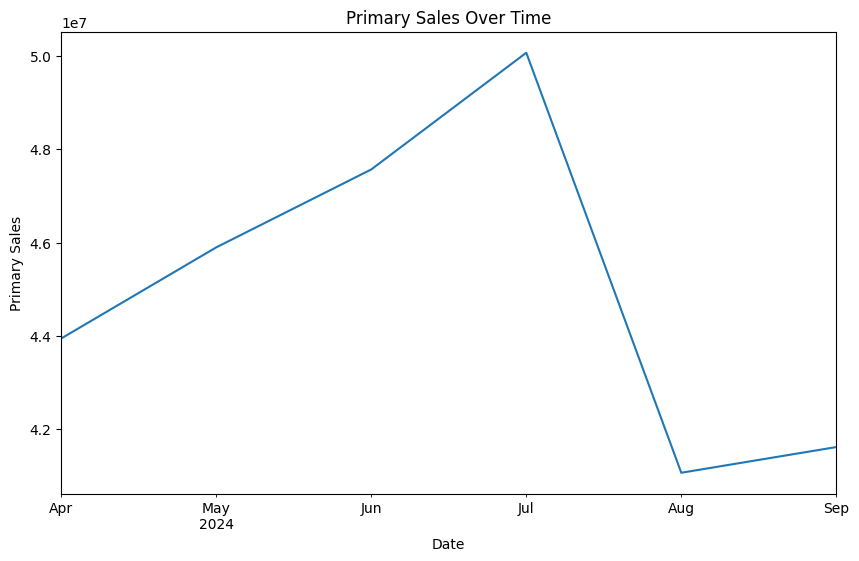

In [40]:
#Plot the data to understand the trend
df_monthly.plot(figsize=(10, 6))
plt.title('Primary Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Primary Sales')
plt.show()

In [41]:
#Train the ARIMA model
model = ARIMA(df_monthly, order=(1, 1, 1)) 
model_fit = model.fit()

In [42]:
forecast = model_fit.forecast(steps=1)

In [43]:
print(f"Forecasted Primary Sales for October: {forecast[0]:.2f}")

Forecasted Primary Sales for October: 44036196.90
